![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Mathematics/ApproximatingNonPerfectSquareRoots/approximating-non-perfect-square-roots.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

In [1]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<p> Code is hidden for ease of viewing. Click the Show/Hide button to see. </>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
## List of Imports ##
import random as rand
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ipywidgets import *
import math
from IPython.display import display, Markdown, Latex,Math, HTML, clear_output, Javascript
from traitlets import traitlets
from matplotlib.widgets import Slider, Button, RadioButtons
from fractions import Fraction
from random import randint

%matplotlib inline

# Approximating Square Roots of Non-Perfect Squares

Welcome! In this notebook, we will explore how to estimate the roots of non-perfect square numbers.

As you progress through this math class, you will find that non-perfect squares become more prominent in finding areas and volumes, as well as in finding the side lengths of right triangles. Thus, it is important that we can approximate them, and also apply them to some geometric problems.

## Learning Objectives/Curriculum Objectives

To determine the approximate square root of numbers that are not perfect squares (limited to whole numbers).

## Background

Recall that a **perfect square** is a **whole number** (or positive integer) that is the product of **two identical integers** or **two other perfect squares**. Note that fractions can also be a perfect square. This will happen if the numerator and the denominator are both perfect squares. For example, ${\frac{4}{9}}$ is a perfect square, because 4 is a perfect square, and 9 is a perfect square. 

We could identify whether a number was a perfect square by factoring it into its prime factors or by drawing out a square on grid paper and determining the area. Also, remember that squaring a number and taking the square root are **opposite operations**.

Today, we will be looking at approximating **non-perfect squares**. Non-perfect squares are also **whole numbers** that are not a product of two identical integers or a product of two perfect squares. When we take the square root of these numbers, we won't get an integer, we will get a decimal number.

For example: 16 is a perfect square. Why? Well, we can either take its square root, or we can prime factorize it. If we prime factorize, we would get 16 = 2$\cdot$2$\cdot$2$\cdot$2. Now it may not look like that 16 is the product of two identical integers but it is. We can group the two's together and get 16 = 4 $\cdot$ 4. So, 16 is a perfect square. And, if we were to take the square root of 16, we would end up with ${\sqrt{16} = 4}$.

In contrast, if we prime factorize a non-perfect square, we would find that it has extra unpaired prime factors.

To illustrate this, let's prime factorize 72. After prime factorizing, we get: 72 = 2 $\cdot$ 2 $\cdot$ 2 $\cdot$ 3 $\cdot$ 3 or 72 = 2 $\cdot$ 4 $\cdot$ 9. So, we cannot write 72 as a product of perfect squares, we have a 2 which is unpaired. And we cannot write 72 as a product of identical integers either, since 2, 4, and 9 are different.

Also, the prime numbers: 2, 3, 5, 7, 11, 13,... are all non-perfect squares. This is because they have no factors other than 1 and themselves.

### Why we need to approximate:

We mentioned above that taking the square roots of non-perfect squares gives us a decimal number. More specifically, we will get an **irrational** decimal number. Irrational numbers are numbers that you cannot represent as a fraction, and square roots of non-perfect squares are an example of irrational numbers. A famous example is $\sqrt{2} = 1.414213\ldots$. $\sqrt{2}$ is an irrational number. It has no patterns in its decimal form, and it has infinite decimal places, so we cannot write it as a fraction.

Because these numbers have infinite decimal places, there is no way we can store all of the digits in a computer, we would need one with infinite storage, and that is not physically possible. So as a consequence, we can only store a limited number of decimal places, but we lose accuracy. In many areas of science, engineering and in some areas of math, we often deal with quantities that we can only approximate. An example would be the area of circle, or the volume of a cone, which will often be an irrational number.

## Ways To Approximate Non-Perfect Squares

To begin, we will explore estimating the square roots of non-perfect squares using a calculator.

### Using a Calculator

The quickest and easiest way to approximate a non-perfect square is to use our calculators. Take the number you wish to approximate, find the ${\sqrt{}}$ key, and apply it. Now, depending on how many decimal places you keep, your approximation will be better or worse. 

#### Examples:

1) Approximate the square root of 11 to three decimal places: <br />
We take the square root of 11 and get 3.3166247904... . If we take three decimal places, we will end up with 3.316 as our approximation. And, if we square this number, we get 10.995856. <br />
    
2) Approximate the square root of 45 to five decimal places: <br />
Applying the square root key gives us 6.7082039325... . Taking five decimal places will give us: 6.70820. If we square this number, we get 44.99994724. <br />

3) Approximate the square root of 27 to one decimal place: <br />
Once again applying the square root key, we obtain 5.19611524227... . If we take one decimal place, we get 5.1. Squaring this number gives us 26.01, which is not very exact at all! <br />


As you can see above, taking fewer decimal places resulted in us losing accuracy. 

Now, we will explore the relationship between the accuracy of our estimate and the number of decimal places we keep. Choose an integer by adjusting the first slider, then choose the number of decimal places to keep with the second slider.

In [3]:
## Label Definitions ##
caption1 = widgets.Label(value = "Adjust the sliders to see how taking greater or fewer decimals affects our accuracy!")

## Functions for accuracy activity ##
def Take_Square_Root(Integer, Decimals):
    Estimate = 0
    Estimate = round(math.sqrt(Integer), Decimals) ## Round the integer to the specified number of decimal places ##
    ## Some caption definitions ##
    caption2 = widgets.Label(value = "Actual value: " + str(math.sqrt(Integer)) + ',')
    caption3 = widgets.Label(value = "Estimate: " + str(Estimate) + ',')
    caption4 = widgets.Label(value = "Actual value squared: " + str(Integer))
    caption5 = widgets.Label(value = "Estimate squared: " + str(Estimate ** 2))
    caption6 = widgets.Label(value = "Difference: " + '{0:.15f}'.format(abs(Integer-Estimate ** 2)))
    container = widgets.HBox(children = [caption2, caption4])
    container2 = widgets.HBox(children = [caption3, caption5, caption6])
    display(container)
    display(container2)
    
display(caption1)

#I added "name = " in front of the interact to stop it displaying that output under it
name = interact(Take_Square_Root, Integer = widgets.IntSlider(min = 1, max = 130, value = 1), Decimals = widgets.IntSlider(min = 1, max = 9, step = 1))

Label(value='Adjust the sliders to see how taking greater or fewer decimals affects our accuracy!')

interactive(children=(IntSlider(value=1, description='Integer', max=130, min=1), IntSlider(value=1, descriptio…

#### Questions:

What did you observe as you took more or less decimal places?
How did the estimate differ from the exact value?

### Finding non-perfect square roots on a number line:

Now, we will try to approximate square roots of non-perfect squares using a number line. Suppose we want to approximate the square root of 90 by looking at a number line, denoted by the blue square.

<img src="images/Example_Pt1.jpg">

In order to determine an estimate for the square root of 90, we need to find the closest perfect squares to 90. Those would be 81 and 100. This also means that the square root of 90 falls in between the square root of 81 and the square root of 100, which are 9 and 10. They are shown by the red dots.

<img src="images/Example_Pt2.jpg">

We can see that the square root of 90 is almost halfway between 9 and 10, its just a little bit under 9.5. So, lets try guessing a number that is just a little bit smaller than 9.5, say, 9.45. Our guess is shown by the green diamond.

<img src="images/Example_Pt3.jpg">

Ah, we can see that our guess is close. If we check what the square root of 90 is on our calculator, we find that it equals 9.48683... . It is very difficult to achieve perfect accuracy just visually, however, for our purposes, our guess is good!

### Another way to estimate:

Our guess of 9.45 is a good guess, but if we want more accuracy we need to use another way. Say that we want to estimate the square root of 90 again, but this time we don't want to estimate it visually. Then, we do the following steps:

> 1. First, we need to find what perfect squares 90 lies between. Taking a look at the number line, its 81 and 100. <br />
> 2. Next, we find the difference between the larger perfect square and the smaller perfect square, which would be 100 - 81 = 19. <br />
> 3. Then, we find the difference between the non-perfect square, which is 90 in this example, and the smaller perfect square, 81. So we would get 90 - 81 = 9. <br />
> 4. Now, we will form a fraction, with the number we got in step three as our numerator, and the number we got in step two as our denominator. So we would have 9/19. <br />
> 5. Next, we will take the square root of the smaller perfect square, in this case 81, and then add our fraction to it. So we get 9 + 9/19. In decimal form, this is 9.47368... . <br />
> 6. Finally, square the number you got in step 5, in this example, we get 89.74909. <br />

Excellent! Our guess is a lot closer now than before when we determined it visually.

In this next activity, we will apply what we have learned above to finding square roots on a number line. First, find the larger and smaller perfect squares on the number line. Remember, they have to be the closest perfect squares. If you have found the two closest squares, then estimate it visually and enter your answer, click the "Check the results" button and you should see it placed on the number line. We aren't looking for perfect accuracy, just find a value that is close to the actual answer.

If you want to get a new question, click the "Restart" button.

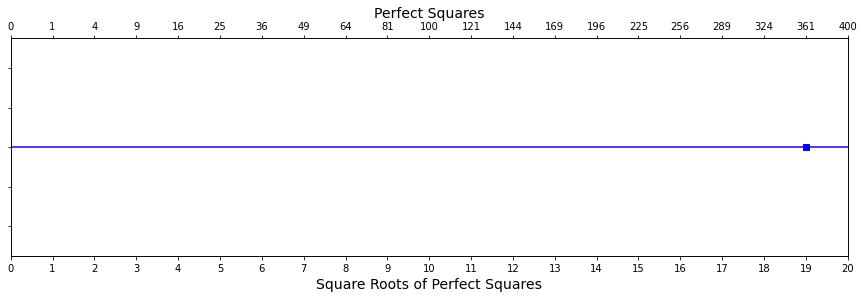

**Estimate the square root of 361:**

Button(button_style='info', description='Check the results', style=ButtonStyle())

HTML(value=' ')

In [4]:
digit=randint(2, 400)

## Widget Definitions ##
style = {'description_width': 'initial'}
dropdown_options=['1', '2', '3','4','5','6','7','8','9','10','11', '12', '13','14','15','16','17','18','19','20']
Get_Smaller_Square = widgets.Dropdown(options=dropdown_options,description = "Enter the smaller perfect square:", style = style, value = '1')
Get_Larger_Square = widgets.Dropdown(options=dropdown_options,description = "Enter the larger perfect square:", style = style, value = '1')
Get_User_Estimate = widgets.FloatText(description = "What is your estimate?", style = style, value = '0')
submit_button=widgets.Button(description='Check the results',button_style='info',disabled=False)
reset_button=widgets.Button(description='Restart',disabled=False)
warning=widgets.HTML(value=" ")


def on_button_submit_clicked(b):
    global digit
    
    
    if int(Get_Larger_Square.value) < int(Get_Smaller_Square.value):
        warning.value="<font color='red'>Try again: larger perfect square should be greater than or equal to smaller perfect square</font>"
    else :
        if (Get_User_Estimate.value>=int(Get_Smaller_Square.value)) &(Get_User_Estimate.value<=int(Get_Larger_Square.value)):

            
            fig, ax1 = plt.subplots(figsize=(15,4))
            ax1.set_yticklabels([])
            
            ax2 = ax1.twiny()
            ax1.set_xlabel("Square Roots of Perfect Squares",size=14)
            ax2.set_xlabel("Perfect Squares",size=14)
            
            ax2.set_xlim(ax1.get_xlim())
           
            ax2.set_xticks(np.arange(0,21,1))
            ax1.set_xticks(np.arange(0,21,1))
            labels=list(range(21))
            labels_squared=[number**2 for number in labels]
            ax1.set_xticklabels(labels)    
            ax2.set_xticklabels(labels_squared)    

            
            x = np.linspace(0,20,100)
            y=x*0
            plt.plot(x, y, '-b')
            plt.plot(math.sqrt(digit), 0, 'b', marker="s")
            
            plt.plot(int(Get_Smaller_Square.value), 0, 'r',marker="o")
            plt.plot(int(Get_Larger_Square.value), 0, 'r',marker="o")
            
            plt.plot(Get_User_Estimate.value, 0, 'g',marker="o")
            
            plt.show()
            
            warning.value=""
            b.disabled=True
            Get_User_Estimate.disabled=True
            Get_Smaller_Square.disabled=True
            Get_Larger_Square.disabled=True
            display(Markdown("**The actual value is**: "+str(math.sqrt(digit))))
            display(Markdown("**Difference**: "+'{0:.15f}'.format(abs(math.sqrt(digit)-Get_User_Estimate.value))))
            display(reset_button)
        else:
            warning.value="<font color='red'>Try again: your estimate should be between larger and smaller perfect squares</font>"
    
submit_button.on_click(on_button_submit_clicked)

def restart_cell(b):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

reset_button.on_click(restart_cell)



fig, ax1 = plt.subplots(figsize=(15,4))
ax1.set_yticklabels([])
            
ax2 = ax1.twiny()
ax1.set_xlabel("Square Roots of Perfect Squares",size=14)
ax2.set_xlabel("Perfect Squares",size=14)
            
ax2.set_xlim(ax1.get_xlim())

ax1.set_xticks(np.arange(0,21))
ax2.set_xticks(np.arange(0,21))
labels=list(range(21))
labels_squared=[number**2 for number in labels]
ax1.set_xticklabels(labels)    
ax2.set_xticklabels(labels_squared) 


            
x = np.linspace(0,20,100)
y=x*0
plt.plot(x, y, '-b')
plt.plot(math.sqrt(digit), 0, 'b', marker="s")

plt.show()


display(Markdown("**Estimate the square root of "+str(digit)+":**"))
widgets.HBox(children = [Get_Smaller_Square, Get_Larger_Square, Get_User_Estimate])
display(widgets.HBox(children = [Get_Smaller_Square, Get_Larger_Square, Get_User_Estimate]))
display(submit_button)
display(warning)

### Questions / Practice:

Did having a visual representation help in finding the square roots?
Were your estimates close to the actual values?
Did using the steps above create a more accurate estimate?

To practice, perform this activity as many times as you want, if you think you are ready, continue on.

## Application:

Now, we are going to apply the knowledge we have learned to approximate the side lengths of squares.

For example, say we want to approximate the side length of the square with area 130:

<img src="images/Example2_Pt1.jpg">

We can see that the side lengths of this square fall between 11 and 12. So, we now create a square of side length 11, and a square of side length 12.

<img src="images/Example2_Pt2.jpg">

Now we can see that the side length of the imperfect square is closer to 11 than it is to 12. Now, we can apply what we have seen from the number line activity. We can either guess the side length visually, or we can find an estimate by calculating it using the steps above. Calculating gives a better estimate, so after doing so, we find the estimated side length equal to 11.39130... . 

<img src="images/Example2_Pt3.jpg">

We are pretty close!

In this activity, we will practice finding side lengths. First try to visually estimate the smaller and larger square sides that bound the non-perfect square. If you think you have the right squares, try to estimate the side length for the non-perfect square and press the "Check the results" button.

If you are ready for a new question, press the "Restart" button.

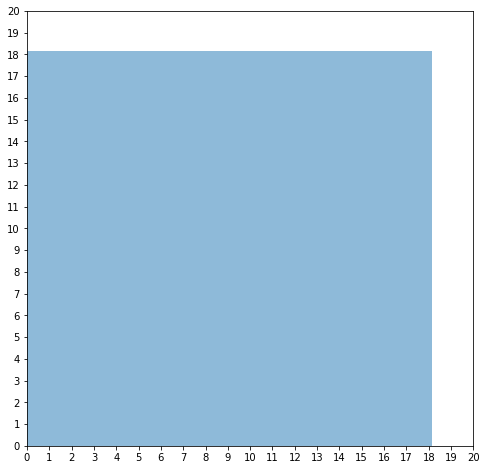

**Find the side length of a square with area 329:**

Button(button_style='info', description='Check the results', style=ButtonStyle())

HTML(value=' ')

In [5]:
digit1=randint(2, 400)

## Widget Definitions ##
style = {'description_width': 'initial'}
dropdown_options=['1', '2', '3','4','5','6','7','8','9','10','11', '12', '13','14','15','16','17','18','19','20']
Get_Smaller_Square1 = widgets.Dropdown(options=dropdown_options,description = "Smaller perfect square side:", style = style, value = '1')
Get_Larger_Square1 = widgets.Dropdown(options=dropdown_options,description = "Larger perfect square side:", style = style, value = '1')
Get_User_Estimate1 = widgets.FloatText(description = "What do you think the side length is?", style = style, value = '0')
submit_button1=widgets.Button(description='Check the results',button_style='info',disabled=False)
reset_button1=widgets.Button(description='Restart',disabled=False)
warning1=widgets.HTML(value=" ")


def on_button_submit1_clicked(b):
    global digit1
    
    
    if int(Get_Larger_Square1.value) < int(Get_Smaller_Square1.value):
        warning.value="<font color='red'>Try again: larger perfect square side should be greater than or equal to smaller perfect square side</font>"
    else :
        if (Get_User_Estimate1.value>=int(Get_Smaller_Square1.value)) &(Get_User_Estimate1.value<=int(Get_Larger_Square1.value)):

            
            fig, ax = plt.subplots(figsize=(8,8))
            
            ax.set_xticks(np.arange(0,21,1))
            ax.set_yticks(np.arange(0,21,1))
            
            Smaller_Rectangle = matplotlib.patches.Rectangle((0,0), int(Get_Smaller_Square1.value), int(Get_Smaller_Square1.value), alpha = 0.5)
            Larger_Rectangle = matplotlib.patches.Rectangle((0,0), int(Get_Larger_Square1.value), int(Get_Larger_Square1.value), alpha = 0.5)
            Imperfect_Rectangle = matplotlib.patches.Rectangle((0,0), math.sqrt(digit1), math.sqrt(digit1), alpha = 0.5)
            
            ax.add_patch(Smaller_Rectangle)
            ax.add_patch(Larger_Rectangle)
            ax.add_patch(Imperfect_Rectangle)
            plt.show()
            
            warning1.value=""
            b.disabled=True
            Get_User_Estimate1.disabled=True
            Get_Smaller_Square1.disabled=True
            Get_Larger_Square1.disabled=True
            display(Markdown("**The actual side length is**: "+str(math.sqrt(digit1))))
            display(Markdown("**Difference**: "+'{0:.15f}'.format(abs(math.sqrt(digit1)-Get_User_Estimate1.value))))
            display(reset_button)
        else:
            warning1.value="<font color='red'>Try again: your estimate should be between larger and smaller perfect square sides</font>"
    
submit_button1.on_click(on_button_submit1_clicked)

def restart_cell(b):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

reset_button1.on_click(restart_cell)



fig, ax = plt.subplots(figsize=(8,8))
            
ax.set_xticks(np.arange(0,21,1))
ax.set_yticks(np.arange(0,21,1))
            
Imperfect_Rectangle = matplotlib.patches.Rectangle((0,0), math.sqrt(digit1), math.sqrt(digit1), alpha = 0.5)
            
ax.add_patch(Imperfect_Rectangle)
plt.show()


display(Markdown("**Find the side length of a square with area "+str(digit1)+":**"))
widgets.HBox(children = [Get_Smaller_Square1, Get_Larger_Square1, Get_User_Estimate1])
display(widgets.HBox(children = [Get_Smaller_Square1, Get_Larger_Square1, Get_User_Estimate1]))
display(submit_button1)
display(warning1)

### Questions / Practice:

Practice this activity in two ways, estimate the side length visually and find the side length of the square. Then, apply the non-visual method find a better estimate.

## Conclusion:

In this notebook, we have seen how to:

> 1. Check whether or not a number is a perfect or non-perfect square through prime factorization <br />
> 2. Explored how keeping more or less decimal places affects accuracy <br />
> 3. Found how to use number lines to our advantage in estimating square roots <br />
> 4. Applied these methods to finding unknown side lengths of squares <br />

By now, you should be comfortable estimating the square roots of non-perfect squares, both visually and by using the formula.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)